In [10]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib
from textblob import TextBlob
import re
from sklearn.model_selection import train_test_split
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

In [2]:
column_names = ['query','wellformedness']
df = pd.read_csv('well_formedness_train.tsv', delimiter='\t', header = None, names = column_names)

In [3]:
df.head()

,query,wellformedness
0,The European Union includes how many ?,0.2
1,What are Mia Hamms accomplishment ?,0.4
2,Which form of government is still in place in ...,1.0
3,When was the canal de panama built ?,0.8
4,What color is the black box on commercial aero...,0.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Data columns (total 2 columns):
query             17500 non-null object
wellformedness    17500 non-null float64
dtypes: float64(1), object(1)
memory usage: 273.5+ KB


In [7]:
df.wellformedness.value_counts()

1.000000    4189
0.000000    3773
0.200000    2779
0.800000    2578
0.400000    2081
0.600000    2002
0.833333      32
0.666667      22
0.166667      19
0.500000      13
0.333333      12
Name: wellformedness, dtype: int64

In [8]:
df.wellformedness.describe()

count    17500.000000
mean         0.508331
std          0.379398
min          0.000000
25%          0.200000
50%          0.600000
75%          0.800000
max          1.000000
Name: wellformedness, dtype: float64

the 7289
what 6989
is 5562
of 4460
how 4242
in 3632
are 2133
do 1915
you 1686
many 1479
to 1296
where 1247
does 1200
and 1082
for 1020
did 959
on 947
much 892
was 774
can 760


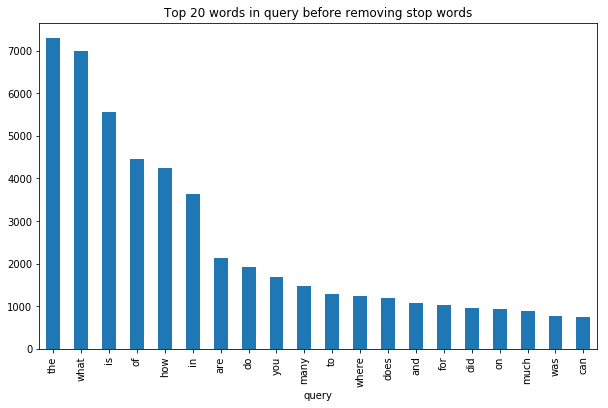

In [11]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['query'], 20)
for word, freq in common_words:
    print(word, freq)
pd.DataFrame(common_words, columns = ['query' , 'count']).plot(x = 'query', kind='bar', title ="Top 20 words in query before removing stop words", legend=False);

does 1200
did 959
make 272
year 229
located 221
people 195
world 189
live 180
worth 172
use 170
cost 168
value 166
population 164
money 156
invented 148
calories 147
change 147
country 146
kind 145
used 138


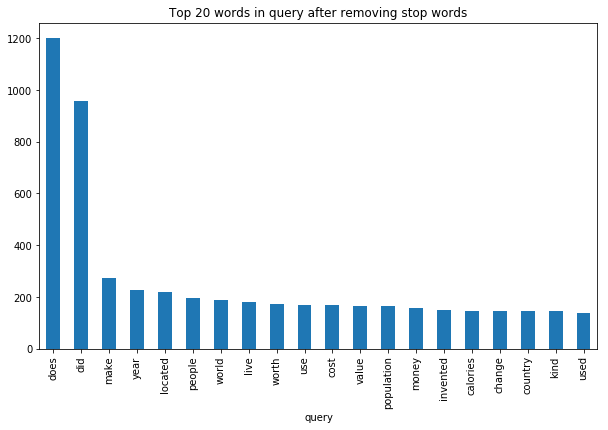

In [12]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['query'], 20)
for word, freq in common_words:
    print(word, freq)
pd.DataFrame(common_words, columns = ['query' , 'count']).plot(x = 'query', kind='bar', title ="Top 20 words in query after removing stop words", legend=False);

In [13]:
df['query_len'] = df['query'].astype(str).apply(len)
df['word_count'] = df['query'].apply(lambda x: len(str(x).split()))

In [14]:
df.head()

,query,wellformedness,query_len,word_count
0,The European Union includes how many ?,0.2,38,7
1,What are Mia Hamms accomplishment ?,0.4,35,6
2,Which form of government is still in place in ...,1.0,54,11
3,When was the canal de panama built ?,0.8,36,8
4,What color is the black box on commercial aero...,0.6,53,10


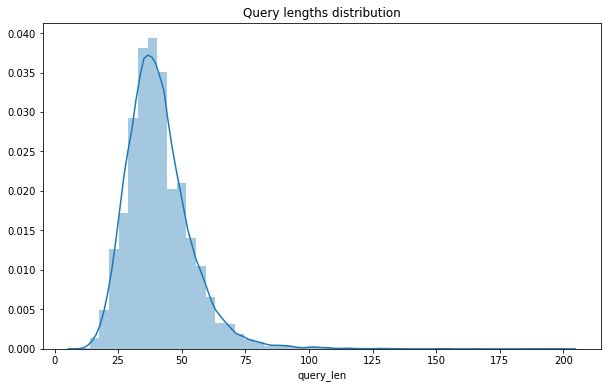

In [15]:
sns.distplot(df['query_len'])
plt.title('Query lengths distribution');

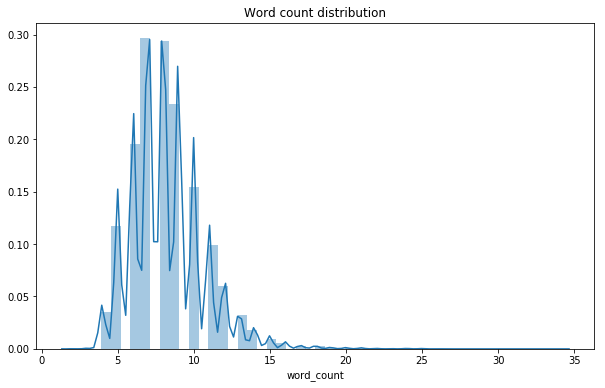

In [16]:
sns.distplot(df['word_count'])
plt.title('Word count distribution');

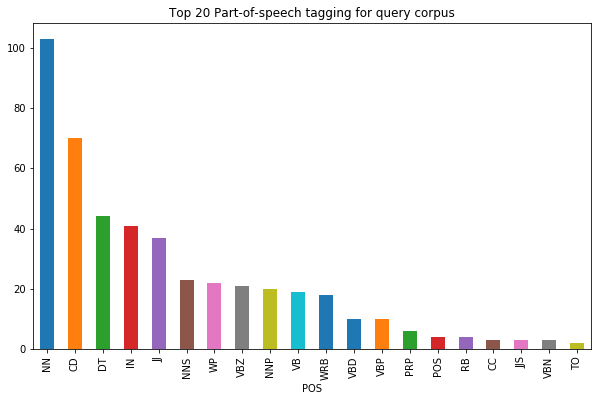

In [17]:
blob = TextBlob(str(df['query']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'] )
pos_df.pos.value_counts()[:20].plot(x = 'pos', kind='bar')
plt.title('Top 20 Part-of-speech tagging for query corpus')
plt.xlabel('POS');

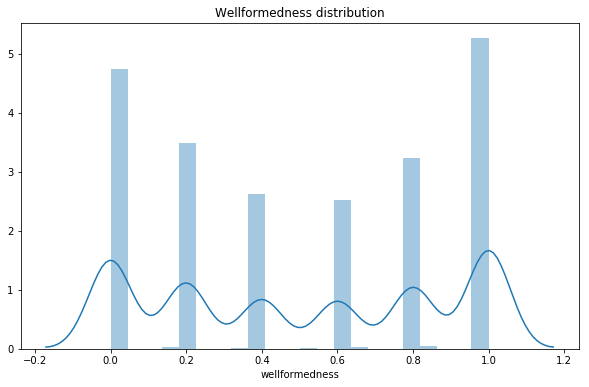

In [18]:
sns.distplot(df['wellformedness'])
plt.title('Wellformedness distribution');

In [19]:
df.head()

,query,wellformedness,query_len,word_count
0,The European Union includes how many ?,0.2,38,7
1,What are Mia Hamms accomplishment ?,0.4,35,6
2,Which form of government is still in place in ...,1.0,54,11
3,When was the canal de panama built ?,0.8,36,8
4,What color is the black box on commercial aero...,0.6,53,10


In [20]:
df['label'] = np.where(df['wellformedness']>=0.8, 1, 0)

In [21]:
df.head()

,query,wellformedness,query_len,word_count,label
0,The European Union includes how many ?,0.2,38,7,0
1,What are Mia Hamms accomplishment ?,0.4,35,6,0
2,Which form of government is still in place in ...,1.0,54,11,1
3,When was the canal de panama built ?,0.8,36,8,1
4,What color is the black box on commercial aero...,0.6,53,10,0


In [22]:
df.label.value_counts()

0    10701
1     6799
Name: label, dtype: int64

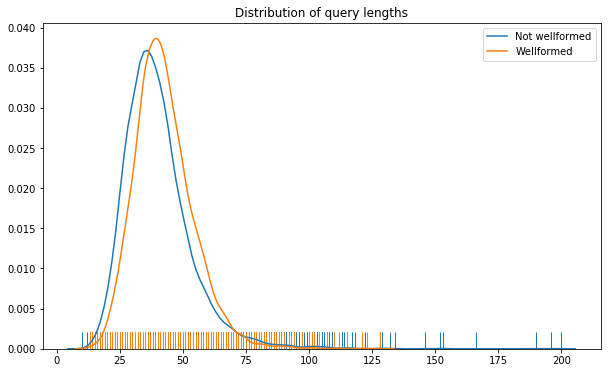

In [23]:
target_0 = df.loc[df['label'] == 0]
target_1 = df.loc[df['label'] == 1]

sns.distplot(target_0[['query_len']], hist=False, rug=True, label = 'Not wellformed')
sns.distplot(target_1[['query_len']], hist=False, rug=True, label = 'Wellformed')
plt.legend()
plt.title('Distribution of query lengths');

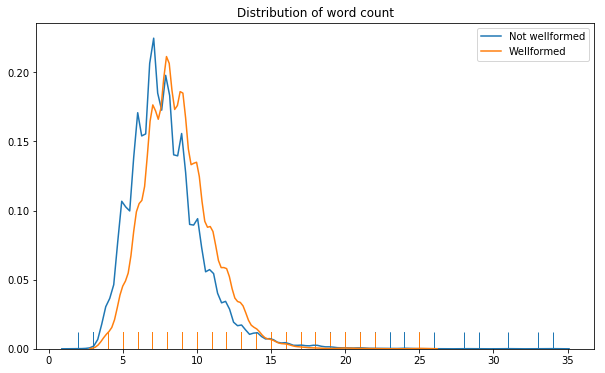

In [24]:
sns.distplot(target_0[['word_count']], hist=False, rug=True, label = 'Not wellformed')
sns.distplot(target_1[['word_count']], hist=False, rug=True, label = 'Wellformed')
plt.legend()
plt.title('Distribution of word count');

Seems in general, wellformed queries are longer than thoes not wellformed queries.

In [25]:
df = df[['query', 'label']]
df['query'] = df['query'].apply(lambda x: x.lower())

In [26]:
column_names = ['query','wellformedness']
valid = pd.read_csv('wellformedness_dev.tsv', delimiter='\t', header = None, names = column_names)
valid['label'] = np.where(valid['wellformedness']>=0.8, 1, 0)
valid = valid[['query', 'label']]
valid['query'] = valid['query'].apply(lambda x: x.lower())

In [27]:
all_data = pd.concat((df, valid))

In [31]:
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from sklearn import preprocessing

In [32]:
X_train = all_data[:df.shape[0]]
X_test = all_data[df.shape[0]:]
y_train = df.label
y_test = valid.label

In [46]:
lbl_enc = preprocessing.LabelEncoder()
y_train = lbl_enc.fit_transform(df.label.values)
y_test = lbl_enc.fit_transform(valid.label.values)

In [48]:
target_names = lbl_enc.classes_

In [49]:
countvec = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), stop_words = 'english', binary=True)
countvec.fit(list(X_train) + list(X_test))
X_train_countvec =  countvec.transform(X_train) 
X_test_countvec = countvec.transform(X_test)

In [51]:
clf = xgb.XGBClassifier(n_jobs=-1)
clf.fit(X_train_countvec.tocsc(), y_train)
y_pred = clf.predict(X_test_countvec.tocsc())
print("---Test Set Results---")
print("Accuracy with Xgboost: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

---Test Set Results---
Accuracy with Xgboost: 0.6168
             precision    recall  f1-score   support

          0       0.62      0.99      0.76      2293
          1       0.63      0.03      0.06      1457

avg / total       0.62      0.62      0.49      3750

